<h1> Breast Cancer Prediction and Data Visualization </h1> 
<b>Using K-Nearest Neighbor (KNN) Classifier Algorithm <b>

K-Nearest Neighbors: algorithm for supervised learning. 
Data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

Dataset: <a  href=https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/>  Breast Cancer Wisconsin (Diagnostic) Data Set </a>  

@author: Mariana R. Barros

<h4>Attribute Information:</h4>

1) ID number

2) Diagnosis (M = malignant, B = benign)

3) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Loading Data From a CSV File
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h2>Data Visualization and Analysis

In [3]:
#See how many of each class is in our data set
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
# Basic statistics for all continuous variables
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#Grouping statistics by diagnosis
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


<b>Exploring data with visualization techniques:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff12cc1cd90>]],
      dtype=object)

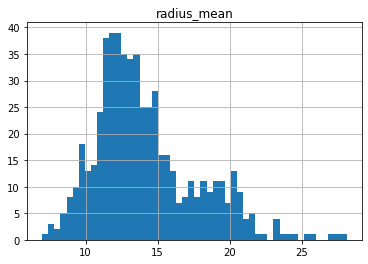

In [6]:
df.hist(column='radius_mean', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff12d3b6650>]],
      dtype=object)

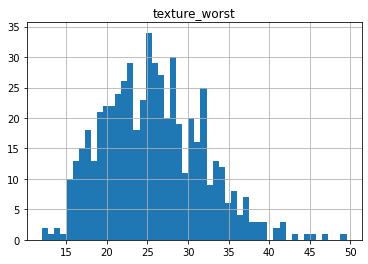

In [7]:
df.hist(column='texture_worst', bins=50)

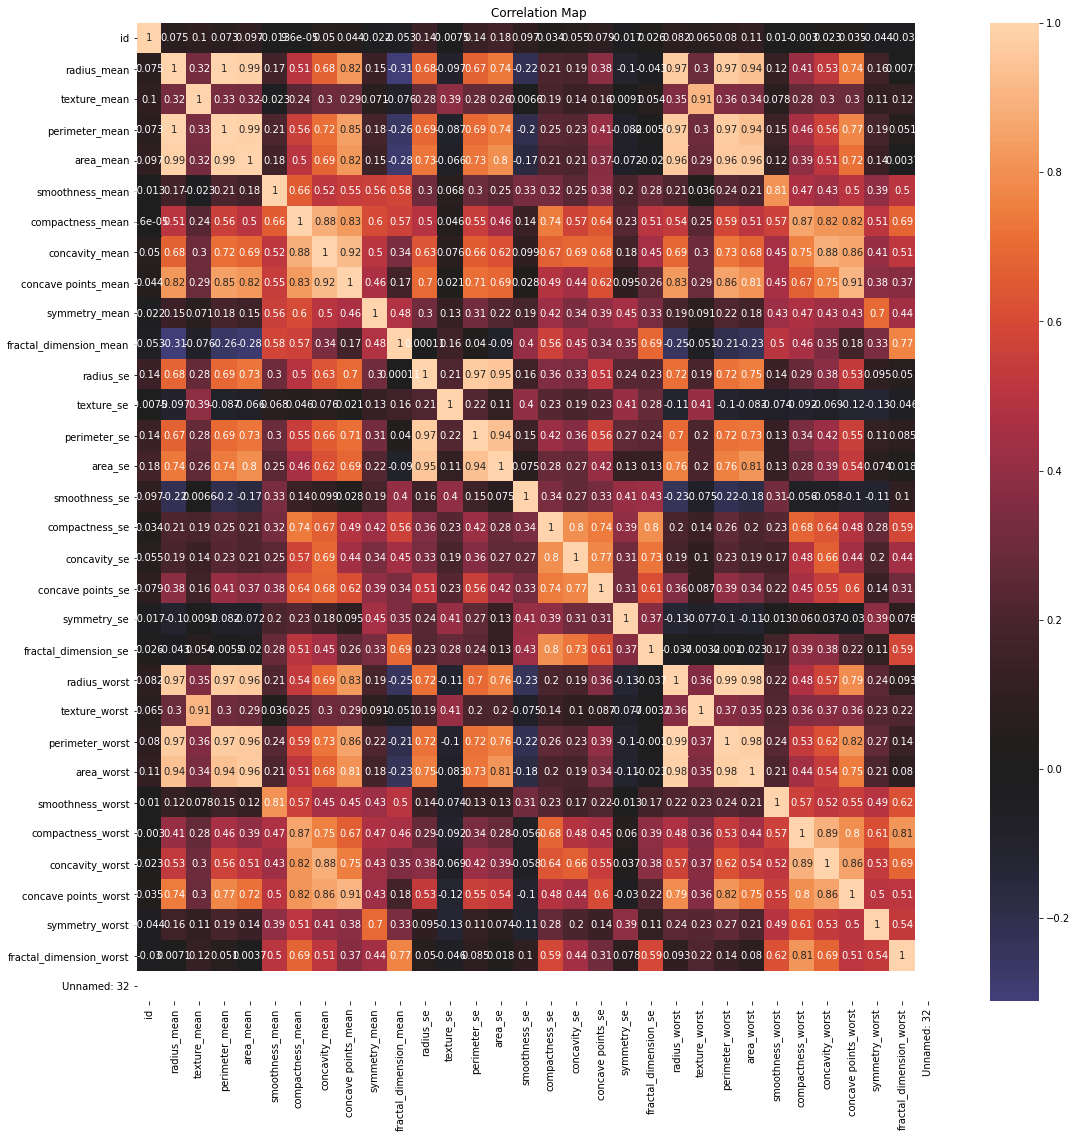

In [8]:
#Correlation between variables
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), center=0 , annot=True)
plt.title('Correlation Map')
plt.show()

<h2> Feature set

In [9]:
#Defining feature sets
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
X = df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] .values  #.astype(float)
X[0:5]

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, 1.2280000e+02,
        1.0010000e+03, 1.1840000e-01, 2.7760000e-01, 3.0010000e-01,
        1.4710000e-01, 2.4190000e-01, 7.8710000e-02, 1.0950000e+00,
        9.0530000e-01, 8.5890000e+00, 1.5340000e+02, 6.3990000e-03,
        4.9040000e-02, 5.3730000e-02, 1.5870000e-02, 3.0030000e-02,
        6.1930000e-03, 2.5380000e+01, 1.7330000e+01, 1.8460000e+02,
        2.0190000e+03, 1.6220000e-01, 6.6560000e-01, 7.1190000e-01,
        2.6540000e-01, 4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, 1.3290000e+02,
        1.3260000e+03, 8.4740000e-02, 7.8640000e-02, 8.6900000e-02,
        7.0170000e-02, 1.8120000e-01, 5.6670000e-02, 5.4350000e-01,
        7.3390000e-01, 3.3980000e+00, 7.4080000e+01, 5.2250000e-03,
        1.3080000e-02, 1.8600000e-02, 1.3400000e-02, 1.3890000e-02,
        3.5320000e-03, 2.4990000e+01, 2.3410000e+01, 1.5880000e+02,
        1.9560000e+03, 1.2380000e-01, 1.8660000e-01, 2.4160000

In [11]:
y = df['diagnosis'].values
y[0:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

<h3>Normalize Data

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-2.36405166e-01,  1.09706398e+00, -2.07333501e+00,
         1.26993369e+00,  9.84374905e-01,  1.56846633e+00,
         3.28351467e+00,  2.65287398e+00,  2.53247522e+00,
         2.21751501e+00,  2.25574689e+00,  2.48973393e+00,
        -5.65265059e-01,  2.83303087e+00,  2.48757756e+00,
        -2.14001647e-01,  1.31686157e+00,  7.24026158e-01,
         6.60819941e-01,  1.14875667e+00,  9.07083081e-01,
         1.88668963e+00, -1.35929347e+00,  2.30360062e+00,
         2.00123749e+00,  1.30768627e+00,  2.61666502e+00,
         2.10952635e+00,  2.29607613e+00,  2.75062224e+00,
         1.93701461e+00],
       [-2.36403445e-01,  1.82982061e+00, -3.53632408e-01,
         1.68595471e+00,  1.90870825e+00, -8.26962447e-01,
        -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
         1.39236330e-03, -8.68652457e-01,  4.99254601e-01,
        -8.76243603e-01,  2.63326966e-01,  7.42401948e-01,
        -6.05350847e-01, -6.92926270e-01, -4.40780058e-01,
         2.60162067e-01, -8.05

<h2>Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 31) (455,)
Test set: (114, 31) (114,)


<h2>Classification

<h3>K nearest neighbor (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

<h4> Finding best k

In [15]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94736842, 0.97368421, 0.97368421, 0.97368421, 0.96491228,
       0.97368421, 0.95614035, 0.97368421, 0.98245614, 0.98245614,
       0.98245614, 0.98245614, 0.97368421, 0.98245614, 0.99122807,
       0.99122807, 0.99122807, 0.98245614, 0.98245614, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.98245614, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.96491228, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.96491228, 0.97368421])

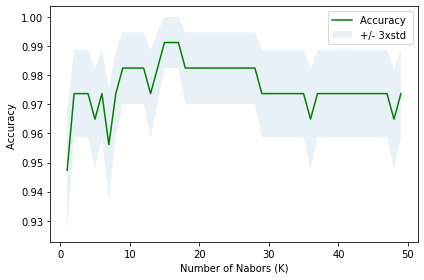

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9912280701754386 with k= 15


<h3>Classification Report

In [18]:
from sklearn.metrics import classification_report

print("Classification Report: \n\n")
print(classification_report(y_test, yhat))

Classification Report: 


              precision    recall  f1-score   support

           B       0.99      0.97      0.98        80
           M       0.94      0.97      0.96        34

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<h3>Accuracy Score

In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy of BC prediction =', accuracy_score(yhat, y_test)*100)

Accuracy of BC prediction = 97.36842105263158


<h3> Confusion Matrix

Text(91.68, 0.5, 'predicted class')

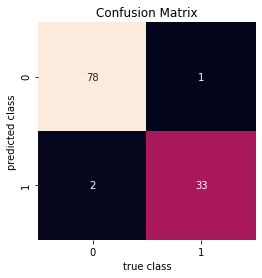

In [20]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, yhat)
sns.heatmap(confmat.T, square = True, annot = True, fmt = 'd', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')